In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [10]:
pd.options.display.max_columns = 50
data = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv', nrows=1000000, sep=',', usecols=None, dtype=None)
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60672 entries, 0 to 60671
Data columns (total 13 columns):
Suburb           60672 non-null object
Address          60672 non-null object
Rooms            60672 non-null int64
Type             60672 non-null object
Price            46836 non-null float64
Method           60672 non-null object
SellerG          60672 non-null object
Date             60672 non-null object
Postcode         60672 non-null int64
Regionname       60672 non-null object
Propertycount    60672 non-null int64
Distance         60672 non-null float64
CouncilArea      60672 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 4.2+ MB


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
count,60672,60672,60672.000000,60672,4.683600e+04,60672,60672,60672,60672.000000,60672,60672.000000,60672.000000,60672
unique,380,55594,NaN,3,NaN,9,462,108,NaN,8,NaN,NaN,34
top,Reservoir,3 Parker St,NaN,h,NaN,S,Barry,24/03/2018,NaN,Southern Metropolitan,NaN,NaN,Boroondara City Council
freq,1180,7,NaN,43411,NaN,33182,6674,1144,NaN,16894,NaN,NaN,4926
mean,NaN,NaN,3.111320,NaN,9.980817e+05,NaN,NaN,NaN,3125.607100,NaN,7614.348744,12.693279,NaN
std,NaN,NaN,0.958279,NaN,5.954452e+05,NaN,NaN,NaN,125.341264,NaN,4419.056392,7.593886,NaN
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,3000.000000,NaN,39.000000,0.000000,NaN
25%,NaN,NaN,3.000000,NaN,6.200000e+05,NaN,NaN,NaN,3056.000000,NaN,4380.000000,7.000000,NaN
50%,NaN,NaN,3.000000,NaN,8.300000e+05,NaN,NaN,NaN,3107.000000,NaN,6795.000000,11.700000,NaN
75%,NaN,NaN,4.000000,NaN,1.220000e+06,NaN,NaN,NaN,3163.000000,NaN,10412.000000,16.700000,NaN


In [11]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data['Date'] = pd.to_datetime(data['Date'])
initial_date = min(pd.to_datetime(data['Date']))
data['DaysFrom'] = data['Date'] - initial_date
data.DaysFrom = data.DaysFrom.dt.days
data = data.drop(columns=['Date'])
data['Postcode'] = data['Postcode'].astype(str)

In [12]:
data = data.drop(columns=['Address']) # effectively an index, but not exactly unique, hence redundant  
# (should ideally be used with Date as multi-index in a more advanced analysis)

def add_n_trans(group):
    group['NumberTrans'] = len(group)
    return group

data = data.groupby('DaysFrom').apply(add_n_trans)

,Suburb,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,523,523,523,523,523,523,523,523,523,523,523
1,523,523,523,523,523,523,523,523,523,523,523
2,523,523,523,523,523,523,523,523,523,523,523
3,523,523,523,523,523,523,523,523,523,523,523
4,523,523,523,523,523,523,523,523,523,523,523
5,523,523,523,523,523,523,523,523,523,523,523
6,523,523,523,523,523,523,523,523,523,523,523
7,523,523,523,523,523,523,523,523,523,523,523
9,523,523,523,523,523,523,523,523,523,523,523
10,523,523,523,523,523,523,523,523,523,523,523


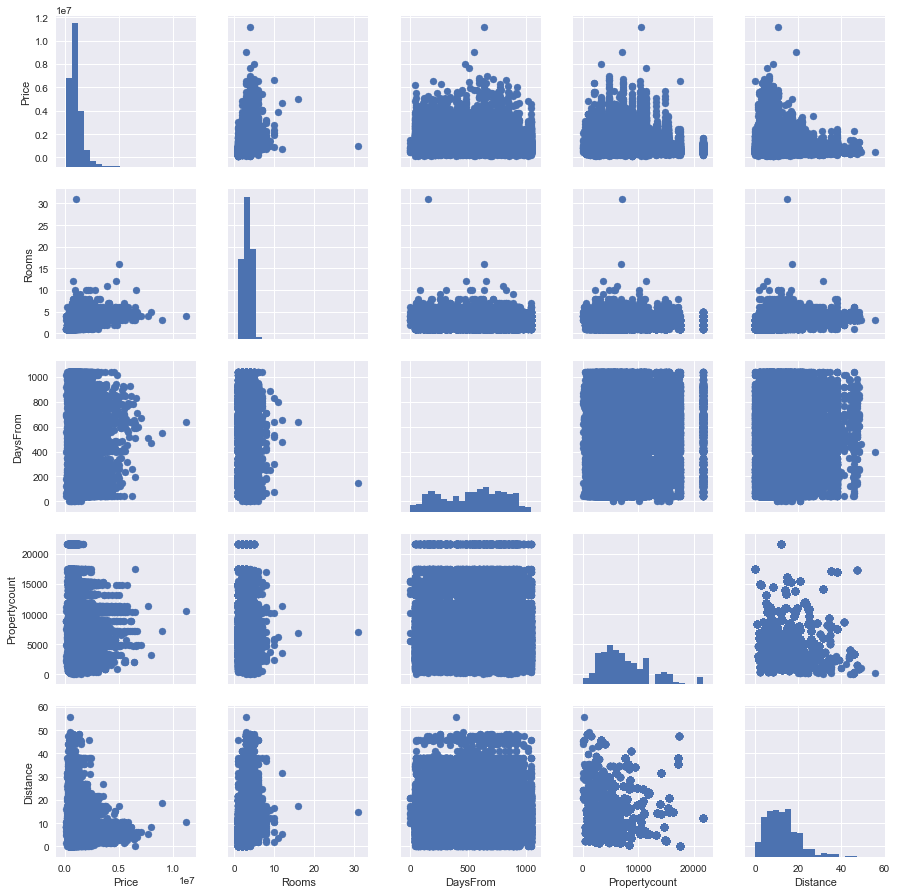

In [5]:
sns.set()
g = sns.PairGrid(data[['Price', 'Rooms', 'DaysFrom', 'Propertycount', 'Distance']])
g = g.map_diag(plt.hist, bins=20)
g = g.map_offdiag(plt.scatter)

data['Price'] = np.log(data['Price']) 

In [6]:
from sklearn.decomposition import PCA

# too much comp cost to separately go through this process for each training set, so do it once for whole dataset
cols_to_transform = data.select_dtypes('object').columns.values
for column in cols_to_transform:
    data_dummies = pd.get_dummies(data, columns = [column], drop_first=True).filter(regex=column).values
    n_dummies = data_dummies.shape[1]
    if n_dummies >= 5:
        n_components = 5
    else:
        n_components = n_dummies
    pca = PCA(n_components=n_components, svd_solver='auto')
    X_new = pca.fit_transform(data_dummies)
    data = data.drop(columns=[column])
    for feature in np.arange(X_new.shape[1]):
        data[column + '_' + str(feature)] = X_new[:, feature]

data.head()

,Rooms,Price,Propertycount,Distance,DaysFrom,NumberTrans,Suburb_0,Suburb_1,Suburb_2,Suburb_3,Suburb_4,Type_0,Type_1,Method_0,Method_1,Method_2,Method_3,SellerG_0,SellerG_1,SellerG_2,SellerG_3,SellerG_4,Postcode_0,Postcode_1,Postcode_2,Postcode_3,Postcode_4,Regionname_0,Regionname_1,Regionname_2,Regionname_3,Regionname_4,CouncilArea_0,CouncilArea_1,CouncilArea_2,CouncilArea_3,CouncilArea_4
0,3,14.214287,4019,3.0,342,523,-0.015253,-0.007179,-0.006574,-0.004610,-0.005262,-0.155505,-0.151644,-0.397682,-0.022026,-0.024218,0.00076,-0.263867,0.742067,-0.434222,-0.109796,-0.196548,-0.014001,-0.008159,-0.004742,-0.011708,-0.006376,0.729652,-0.286937,-0.124613,-0.052971,0.001519,0.001882,-0.063867,-0.024725,-0.002375,0.000905
1,3,14.014361,4019,3.0,342,523,-0.015253,-0.007179,-0.006574,-0.004610,-0.005262,-0.155505,-0.151644,-0.397682,-0.022026,-0.024218,0.00076,-0.054686,-0.007251,0.048094,0.028675,0.194190,-0.014001,-0.008159,-0.004742,-0.011708,-0.006376,0.729652,-0.286937,-0.124613,-0.052971,0.001519,0.001882,-0.063867,-0.024725,-0.002375,0.000905
2,3,14.166167,4019,3.0,342,523,-0.015253,-0.007179,-0.006574,-0.004610,-0.005262,-0.155505,-0.151644,-0.397682,-0.022026,-0.024218,0.00076,-0.244736,-0.667500,-0.546150,-0.121818,-0.204976,-0.014001,-0.008159,-0.004742,-0.011708,-0.006376,0.729652,-0.286937,-0.124613,-0.052971,0.001519,0.001882,-0.063867,-0.024725,-0.002375,0.000905
3,3,14.230926,1543,7.5,342,523,-0.016720,-0.008259,-0.007697,-0.005541,-0.006208,-0.155505,-0.151644,-0.397682,-0.022026,-0.024218,0.00076,0.900032,0.020650,-0.098902,-0.041707,-0.116976,-0.031156,-0.032835,-0.026312,0.044659,-0.112043,-0.104562,0.849955,-0.229078,-0.078473,0.002150,-0.007422,-0.107448,-0.070269,-0.036118,-0.033834
4,2,13.415033,3464,10.4,342,523,-0.019054,-0.010118,-0.009780,-0.007325,-0.008068,-0.155505,-0.151644,-0.397682,-0.022026,-0.024218,0.00076,-0.244736,-0.667500,-0.546150,-0.121818,-0.204976,-0.018432,-0.010411,-0.015006,-0.034040,-0.022505,-0.104562,0.849955,-0.229078,-0.078473,0.002150,-0.007422,-0.107448,-0.070269,-0.036118,-0.033834


In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

# computes cross entropy of the predicted gaussian and the point distribution of the true value, averaged over all observations  
def cross_entropy_gaus(y_true, mu, sigma):
    return np.log(np.sqrt(np.pi * sigma)) + mean_squared_error(y_true, mu) / sigma

data['DaysFromSqr'] = np.square(data['DaysFrom'])
data['PropertycountSqr'] = np.square(data['Propertycount'])
data['NumberTransSqr'] = np.square(data['NumberTrans'])
data['DistanceSqr'] = np.square(data['Distance'])

data['DaysFromPropertycount'] = data['DaysFrom'] * data['Propertycount']
data['DaysFromNumberTrans'] = data['DaysFrom'] * data['NumberTrans']
data['DaysFromDistance'] = data['DaysFrom'] * data['Distance']

data['PropertycountNumberTrans'] = data['Propertycount'] * data['NumberTrans']
data['PropertycountDistance'] = data['Propertycount'] * data['Distance']

data['NumberTransDistance'] = data['NumberTrans'] * data['Distance']

index = data.index

X = data.drop('Price', axis=1).values


y = data['Price'].values

n_splits = 3
cross_entropy = np.zeros(n_splits)
cross_entropy_naive = np.zeros(n_splits)
cross_entropy_rf = np.zeros(n_splits)

k_fold = KFold(n_splits=n_splits)
for k, (train, test) in enumerate(k_fold.split(X, y)):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]  

    mu_naive = y_train.mean() * np.ones(len(X_test))
    sigma_naive = y_train.var()

    reg = linear_model.BayesianRidge()
    reg.fit(X_train, y_train)
    mu = reg.predict(X_test)
    sigma = 1 / reg.alpha_

    rf_regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=50)
    rf_regr.fit(X_train, y_train)
    mu_rf = rf_regr.predict(X_test)
    sigma_rf = y_train.var()
    
    cross_entropy[k] = cross_entropy_gaus(y_test, mu, sigma) 
    cross_entropy_naive[k] = cross_entropy_gaus(y_test, mu_naive, sigma_naive) 
    cross_entropy_rf[k] = cross_entropy_gaus(y_test, mu_rf, sigma_rf)
    
print('bayes_regr_mean', cross_entropy.mean())
print('bayes_regr_std', cross_entropy.std())
print('naive_mean', cross_entropy_naive.mean())
print('naive_std', cross_entropy_naive.std())
print('rf_mean', cross_entropy_rf.mean())
print('rf_std', cross_entropy_rf.std())

0.31427839762442106
0.029882135918300568
0.8764300680212074
0.009532988500170564
0.4886882763892984
0.0011732008825509849


In [8]:
reg = linear_model.BayesianRidge()
reg.fit(X, y)
price = np.exp(reg.predict(X))
df = pd.DataFrame(price, index=index)
df.to_csv('output_predictions.csv')